In [3]:
%pip install yfinance pandas matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import pandas as pd

In [5]:
# 주식 정보 심볼 리스트
tickers = ['AAPL', 'TSLA', 'GOOGL']

In [6]:
# fetch data on each stock
data = yf.download(tickers, period='1mo', interval='1d')
print(data['Close'])

[*********************100%***********************]  3 of 3 completed

Ticker                           AAPL       GOOGL        TSLA
Date                                                         
2024-09-17 00:00:00+00:00  216.789993  159.320007  227.869995
2024-09-18 00:00:00+00:00  220.690002  159.809998  227.199997
2024-09-19 00:00:00+00:00  228.869995  162.139999  243.919998
2024-09-20 00:00:00+00:00  228.199997  163.589996  238.250000
2024-09-23 00:00:00+00:00  226.470001  161.850006  250.000000
2024-09-24 00:00:00+00:00  227.369995  162.289993  254.270004
2024-09-25 00:00:00+00:00  226.369995  161.490005  257.019989
2024-09-26 00:00:00+00:00  227.520004  162.729996  254.220001
2024-09-27 00:00:00+00:00  227.789993  163.949997  260.459991
2024-09-30 00:00:00+00:00  233.000000  165.850006  261.630005
2024-10-01 00:00:00+00:00  226.210007  166.990005  258.019989
2024-10-02 00:00:00+00:00  226.779999  165.860001  249.020004
2024-10-03 00:00:00+00:00  225.669998  165.860001  240.660004
2024-10-04 00:00:00+00:00  226.800003  167.059998  250.080002
2024-10-

In [18]:
# 각 주식의 매수가와 주식수
portfolio = {
    'AAPL' : {'shares': 10, 'buy_price': 150},
    'TSLA' : {'shares': 5, 'buy_price': 300},
    'GOOGL' : {'shares': 3, 'buy_price': 2550},
}

# 현재 가격 가져오기
current_prices = data['Close'].iloc[-1] # 최신 종가 사용

print("현재 주가:", current_prices)

현재 주가: Ticker
AAPL     232.242004
GOOGL    164.701797
TSLA     219.740005
Name: 2024-10-17 00:00:00+00:00, dtype: float64


In [19]:
# 포트폴리오 수익률 계산
total_investment = 0
total_value = 0

for ticker in portfolio:
    shares = portfolio[ticker]['shares']
    buy_price = portfolio[ticker]['buy_price']
    current_price = current_prices[ticker]

    investment = shares * buy_price
    value = shares * current_price

    total_investment += investment
    total_value += value

    profit = value - investment

    profit_percent = (profit / investment) * 100
    print(f"{ticker} 수익률: {profit_percent: .2f}%")

portfolio_return = (total_value - total_investment) / total_investment * 100
print(f"포트폴리오 전체 수익률: {portfolio_return: .2f}%")

AAPL 수익률:  54.83%
TSLA 수익률: -26.75%
GOOGL 수익률: -93.54%
포트폴리오 전체 수익률: -63.24%


In [20]:
import matplotlib.pyplot as plt

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944

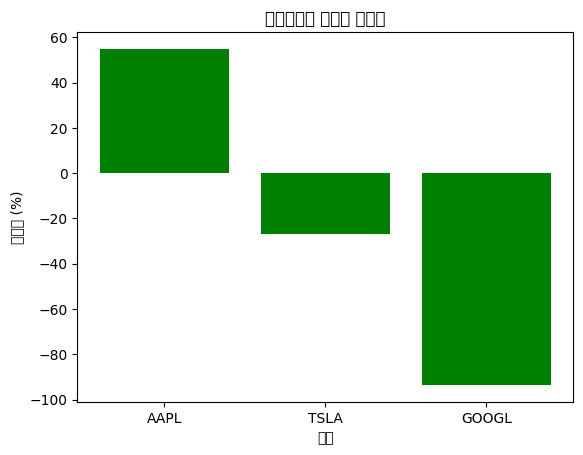

In [58]:
# 각 주식의 수익률을 그래프로 표시
profits = []
labels = []

for ticker in portfolio:
    shares = portfolio[ticker]['shares']
    buy_price = portfolio[ticker]['buy_price']
    current_price = current_prices[ticker]

    investment = shares * buy_price
    value = shares * current_price

    profit = (value - investment) / investment * 100
    profits.append(profit)
    labels.append(ticker)

# 그래프 그리기
plt.bar(labels, profits, color='green')
plt.title('포트폴리오 주식별 수익률')
plt.xlabel('주식')
plt.ylabel('수익률 (%)')
plt.show()